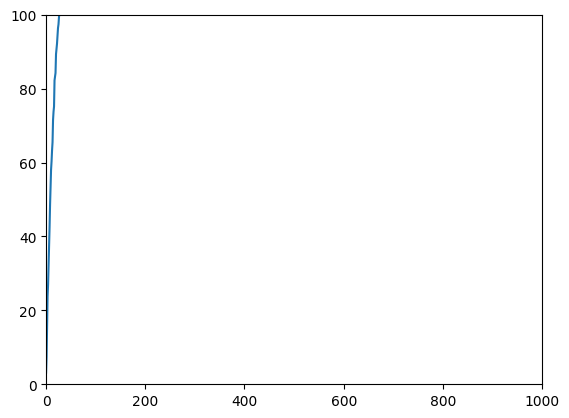

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the Haar cascade file for face detection
HAAR_CASCADE_PATH = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(HAAR_CASCADE_PATH)

def detect_faces(image):
    return cascade.detectMultiScale(image, scaleFactor=1.3, minNeighbors=4, flags=cv2.CASCADE_SCALE_IMAGE, minSize=(20, 20))

def calculate_movement(faceCenter, prevCenter):
    if prevCenter is None:
        return 0
    return np.sqrt((faceCenter[0] - prevCenter[0])**2 + (faceCenter[1] - prevCenter[1])**2)

def main(video_path):
    cap = cv2.VideoCapture(video_path)
    prevCenter = None
    total_movement = 0
    movements = []

    plt.ion()
    fig, ax = plt.subplots()
    line, = ax.plot(movements)
    ax.set_xlim(0, 1000)  # Set to the expected number of frames or adjust dynamically
    ax.set_ylim(0, 100)  # Adjust based on expected movement range

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = detect_faces(gray)
        
        if len(faces) > 0:
            x, y, w, h = faces[0]
            currentCenter = (x + w//2, y + h//2)
            if prevCenter is not None:
                movement = calculate_movement(currentCenter, prevCenter)
                total_movement += movement
                movements.append(total_movement)
                line.set_data(range(len(movements)), movements)
                ax.relim()
                ax.autoscale_view()
                plt.draw()
            prevCenter = currentCenter

        cv2.imshow('Frame', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    plt.ioff()
    plt.show()
    cap.release()
    cv2.destroyAllWindows()


if __name__ == "__main__":
    # Specify the path to your video file here
    video_file_path = 'test_video_2.mp4'
    main(video_file_path)


In [10]:
import cv2
import numpy as np

# Path to the Haar cascade file for face detection
HAAR_CASCADE_PATH = "haarcascade_frontalface_alt.xml"

# Load the cascade for face detection
cascade = cv2.CascadeClassifier(HAAR_CASCADE_PATH)

def detect_faces(image):
    # Detect faces in the image
    detected = cascade.detectMultiScale(image, scaleFactor=1.3, minNeighbors=4, flags=cv2.CASCADE_SCALE_IMAGE, minSize=(10, 10))
    print(detected)

    faces = []
    if len(detected) > 0:
        for (x, y, w, h) in detected:
            faces.append((x, y, w, h))
    return faces

def calculate_movement(faceCenter, prevCenter):
    # Calculate the Euclidean distance between the current center and previous center of the face
    if prevCenter is None:
        return 0
    movement = np.sqrt((faceCenter[0] - prevCenter[0]) ** 2 + (faceCenter[1] - prevCenter[1]) ** 2)
    return movement

def main(video_path):
    # Initialize video capture from the video file
    cap = cv2.VideoCapture(video_path)

    prevCenter = None  # This will store the previous frame's face position
    total_movement = 0  # This accumulates the total head movement

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Convert frame to grayscale for face detection
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = detect_faces(gray)

        if faces:
            x, y, w, h = faces[0]  # Consider the first detected face
            currentCenter = (x + w//2, y + h//2)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

            movement = calculate_movement(currentCenter, prevCenter)
            total_movement += movement
            prevCenter = currentCenter  # Update the previous center

            # Display the total movement on the frame
            cv2.putText(frame, f"Total Movement: {total_movement:.2f}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

        cv2.imshow('Head Movement Tracking', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    print(f"Total head movement throughout the video: {total_movement:.2f}")
    cap.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    # Specify the path to your video file here
    video_file_path = 'test_video_3.mp4'
    main(video_file_path)

error: OpenCV(4.6.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/objdetect/src/cascadedetect.cpp:1389: error: (-215:Assertion failed) scaleFactor > 1 && _image.depth() == CV_8U in function 'detectMultiScale'
